In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

In [3]:
dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Linear Regression:

In [6]:
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

print(linearModel.score(X_test, y_test))

0.7487621400450417


Ridge(L2) Regression:

In [7]:
cross_val_scores_ridge = []
alpha = []

In [8]:
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.2)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.2)

In [9]:
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.2 : 22.483604002377046
0.4 : 23.820460289252257
0.6000000000000001 : 24.668768153388093
0.8 : 25.230999823570933
1.0 : 25.616687037593227
1.2000000000000002 : 25.88884322595359
1.4000000000000001 : 26.085538701194682
1.6 : 26.230708913185797


From the above output, we can conclude that the best value of alpha for the data is 1.6.

In [10]:
ridgeModelChosen = Ridge(alpha = 1.6)
ridgeModelChosen.fit(X_train, y_train)

print(ridgeModelChosen.score(X_test, y_test))

0.7413170732797685


Lasso(L1) Regression:

In [11]:
cross_val_scores_lasso = []
Lambda = []

In [12]:
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.2, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.2)

In [13]:
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.2 : 27.604138623130236
0.4 : 27.424340872457247
0.6000000000000001 : 25.895563660997123
0.8 : 23.071878617248426
1.0 : 18.765254814737858
1.2000000000000002 : 14.996462370788569
1.4000000000000001 : 12.279770083005019
1.6 : 10.64709388062107


From the above output, we can conclude that the best value of lambda is 1.6.

In [14]:
lassoModelChosen = Lasso(alpha = 1.6, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)

print(lassoModelChosen.score(X_test, y_test))

0.636915844571504


Comparing and Visualizing the results

In [15]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]

In [16]:
mapping = {}
mapping['Linear Regression'] = linearModel.score(X_test, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)

In [17]:
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regression : 0.7487621400450417
Ridge Regression : 0.7413170732797685
Lasso Regression : 0.636915844571504


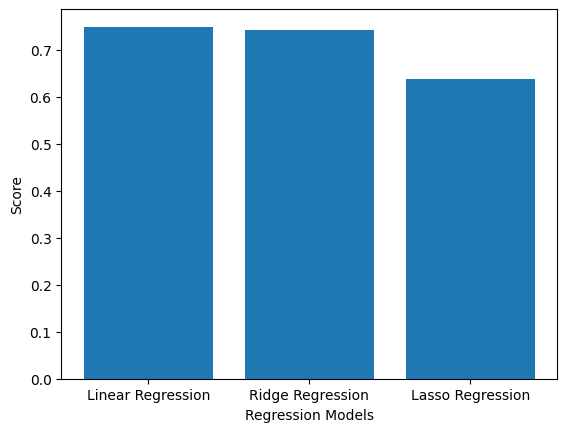

In [18]:
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()